# Store Item Demand Forecasting Challenge

### Group members:
- Khwla Alsafri
- Ahmad Fatani 
- Doaa Alsenani
---

## Introduction

- In this Kaggle competition, we aim to predict 3 months of sales for 50 different items at 10 different stores.


## Importing packages


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn import preprocessing, svm


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Loading  Data


In [ ]:
df_train=pd.read_csv('../input/demand-forecasting-kernels-only/train.csv')

In [ ]:
df_test= pd.read_csv('../input/demand-forecasting-kernels-only/test.csv', index_col='id')

In [ ]:
df_smple=  pd.read_csv('../input/demand-forecasting-kernels-only/sample_submission.csv', index_col='id')

## EDA

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
df_train.shape

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.shape

### Check Missing Values

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.heatmap(df_train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Trian data')

sns.heatmap(df_test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

---

## Clean Data 

- ### Data Types

In [ ]:
# change date to DateTime
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.dtypes

In [ ]:
# change date to DateTime
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.dtypes

- ### Preprocessing: Date Column

In [ ]:
#train data
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['week'] = df_train['date'].dt.week
df_train['weekofyear'] = df_train['date'].dt.weekofyear
df_train['dayofweek'] = df_train['date'].dt.dayofweek
df_train['weekday'] = df_train['date'].dt.weekday
df_train['dayofyear'] = df_train['date'].dt.dayofyear
df_train['quarter'] = df_train['date'].dt.quarter

df_train['is_month_start'] = df_train['date'].dt.is_month_start
df_train['is_month_end'] =df_train['date'].dt.is_month_end
df_train['is_quarter_start'] = df_train['date'].dt.is_quarter_start
df_train['is_quarter_end'] = df_train['date'].dt.is_quarter_end
df_train['is_year_start'] = df_train['date'].dt.is_year_start
df_train['is_year_end'] = df_train['date'].dt.is_year_end

# To convert data type from bool to int
# df_train['is_month_start'] = (df_train.date.dt.is_month_start).astype(int)

In [ ]:
#Test data

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['week'] = df_test['date'].dt.week
df_test['weekofyear'] = df_test['date'].dt.weekofyear
df_test['dayofweek'] = df_test['date'].dt.dayofweek
df_test['weekday'] = df_test['date'].dt.weekday
df_test['dayofyear'] = df_test['date'].dt.dayofyear
df_test['quarter'] = df_test['date'].dt.quarter

df_test['is_month_start'] = df_test['date'].dt.is_month_start
df_test['is_month_end']= df_test['date'].dt.is_month_end
df_test['is_quarter_start'] = df_test['date'].dt.is_quarter_start
df_test['is_quarter_end'] = df_test['date'].dt.is_quarter_end
df_test['is_year_start'] = df_test['date'].dt.is_year_start
df_test['is_year_end'] = df_test['date'].dt.is_year_end


In [ ]:
df_train.info()

In [ ]:
df_test.info()

- ### Drop Columns

In [ ]:
del df_train['date']
del df_test['date']

---

## Visualizations

### Plotting Histograms


In [ ]:
plt.figure(figsize=(33,30))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### We used Tableau to do the Visualizations 
Tableau link :

https://public.tableau.com/profile/doaa8325#!/vizhome/CompetitionSalesofItemsin2017/SalesofItemsin2017?publish=yes

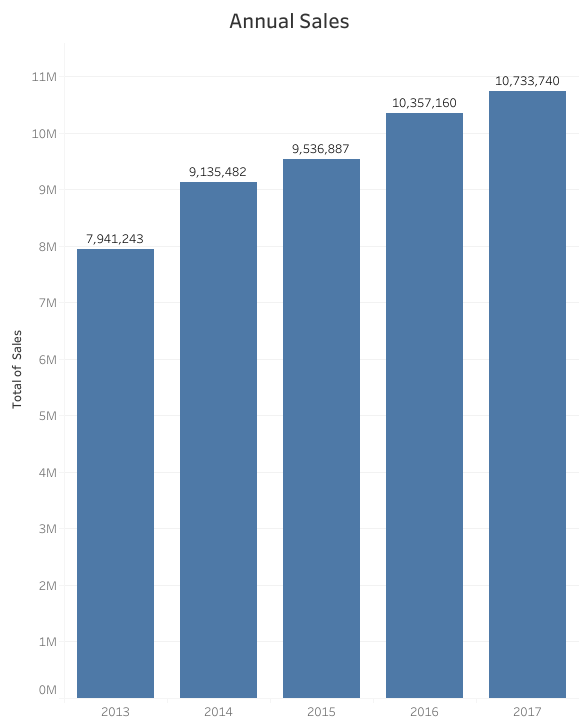

We notice that the sales grew yearly, and between 2013 and 2014 the growth was bigger than others.

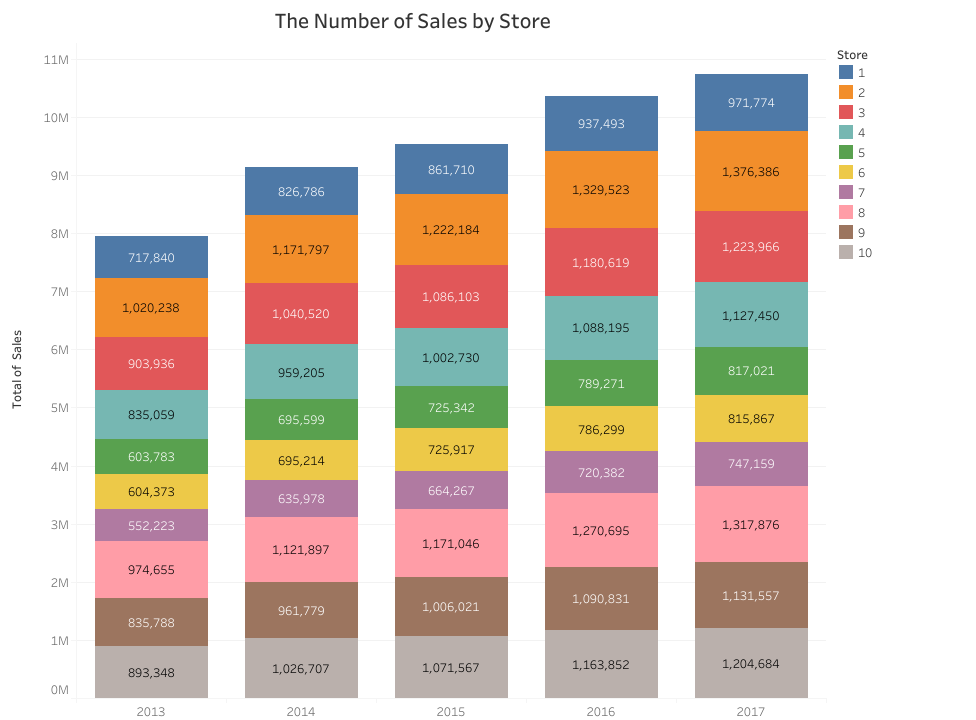

In this chart, we can see the sales of each store from 2013 to 2017, and store 2 was the highest amount of sales then 8 and 3 respectively.

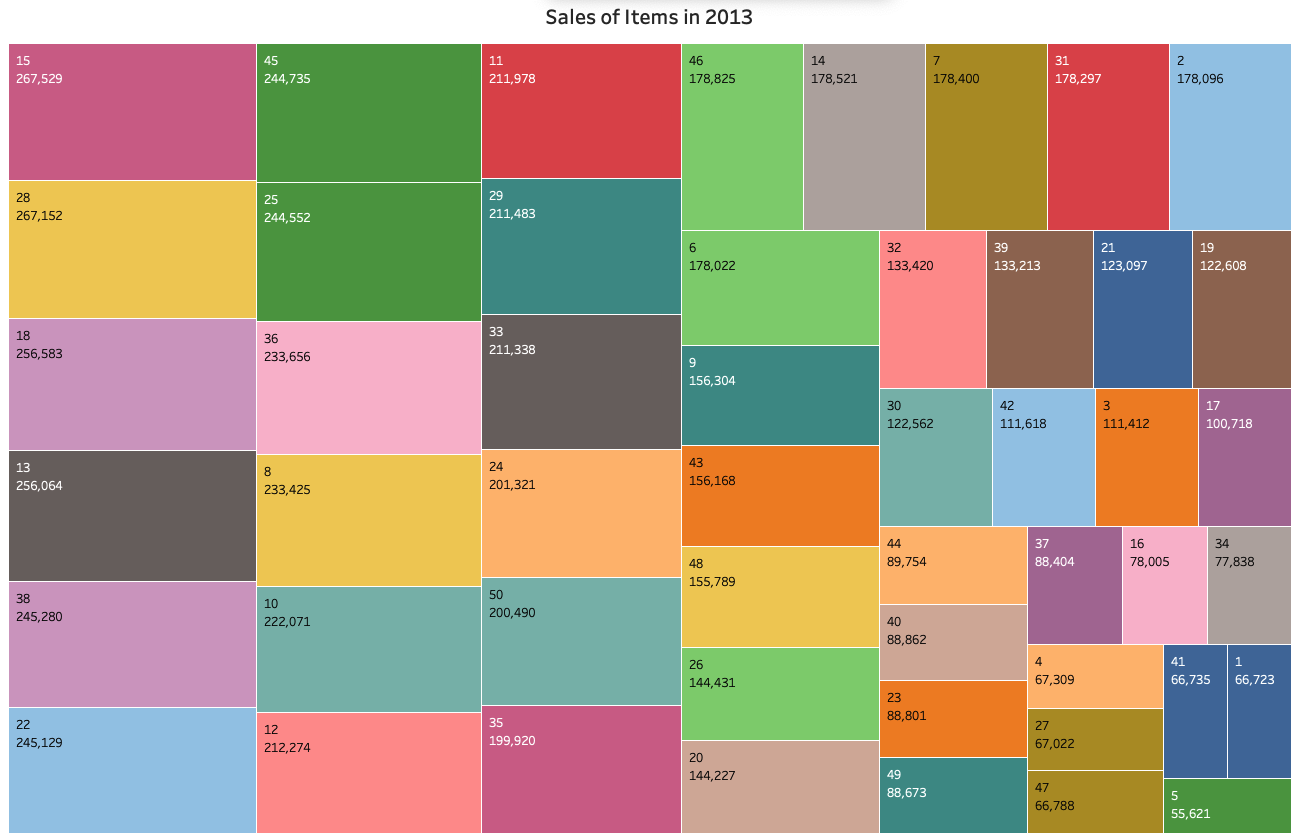

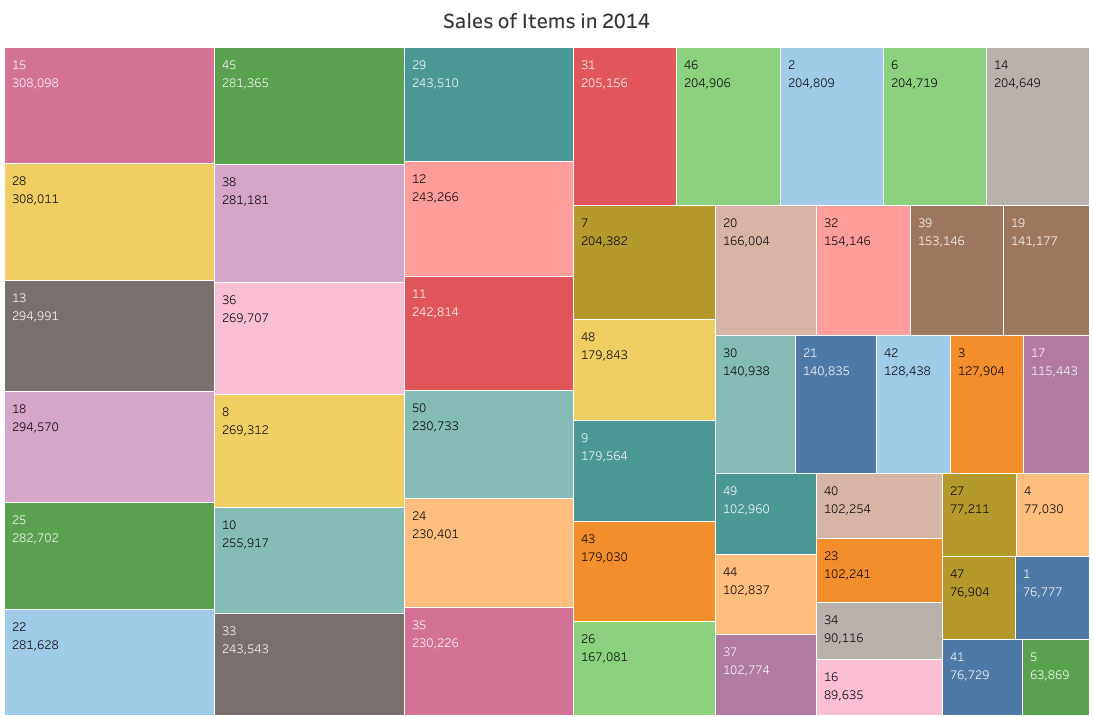

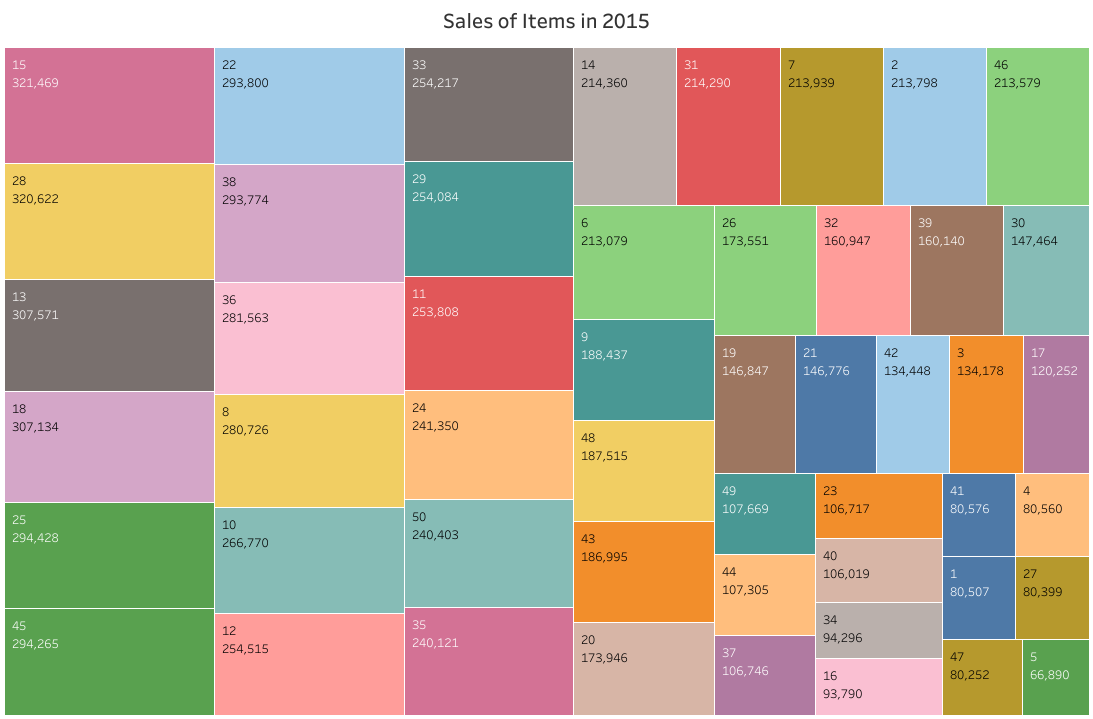

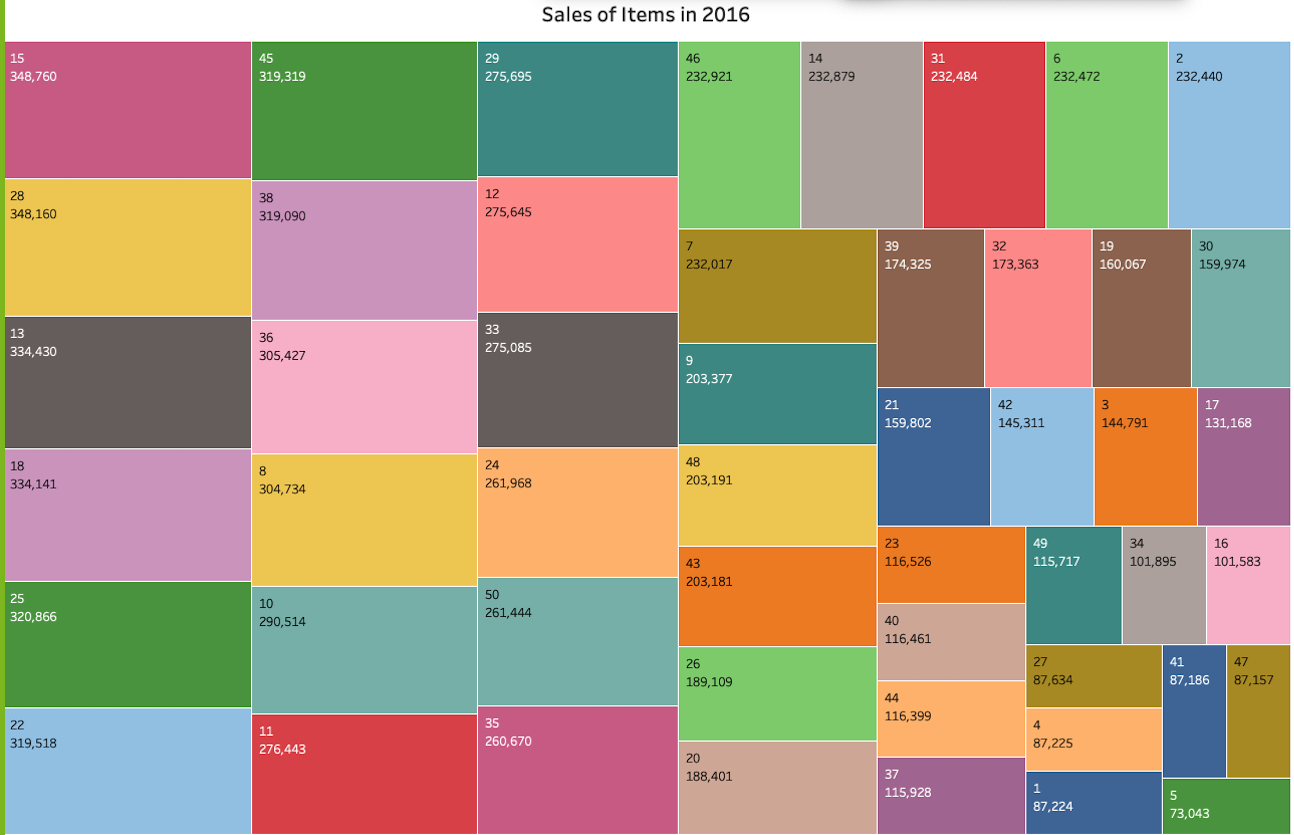

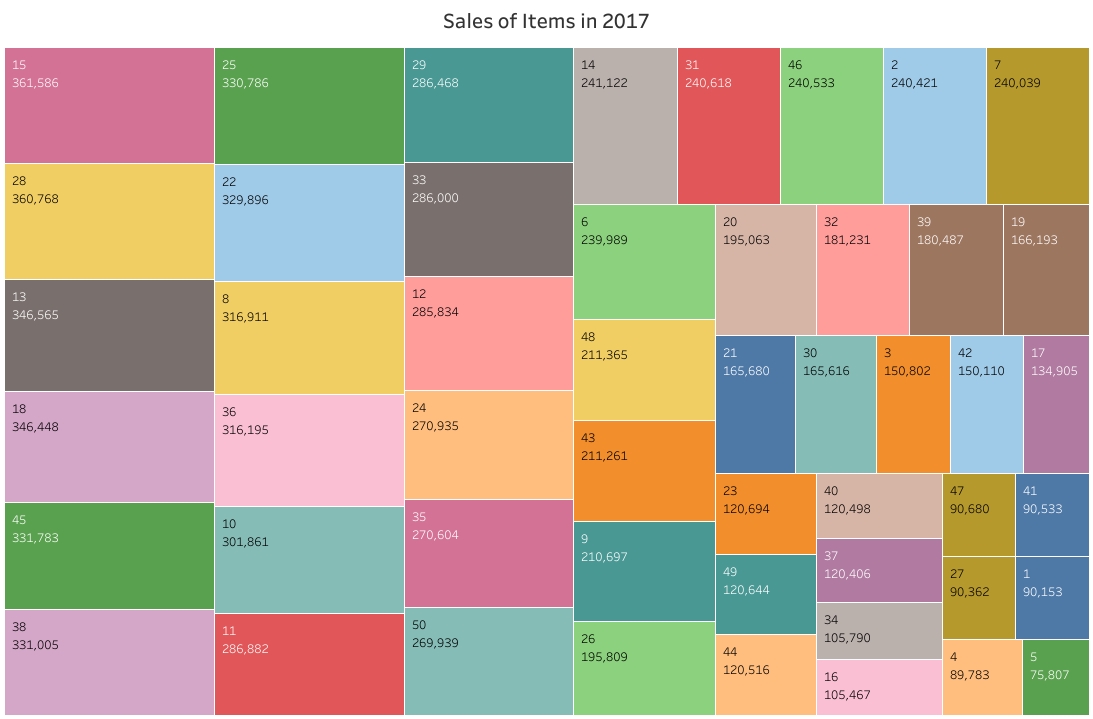

The common items in all years that had the highest numbers of sales were 15 and 28, on the other hand, the common items in all years that had the lowest numbers of sales was 5. 

---

## Modeling

In [ ]:
y = df_train['sales']
X = df_train.drop('sales', axis=1)

In [ ]:
ss = StandardScaler()
Xs =ss.fit_transform(X)
X_test_ss = ss.transform(df_test)

### Build RandomForest Model

In [ ]:
randomF = RandomForestRegressor()
randomF.fit(Xs, y)
print('Score :',randomF.score(Xs, y))

In [ ]:
pred_f = randomF.predict(X_test_ss)

### Submission

In [ ]:
submission = df_smple.drop(['sales'],axis=1)

In [ ]:
submission['sales'] = pred_f

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv')

---

## Visualizing Sales Prediction for 2018 
 We used Tableau to do the Visualizations 

Tableau link :

https://public.tableau.com/profile/doaa8325#!/vizhome/StoreItemDemandForecastingfor3Monthsin2018/TopSalesofItemsinFebruary2018?publish=yes

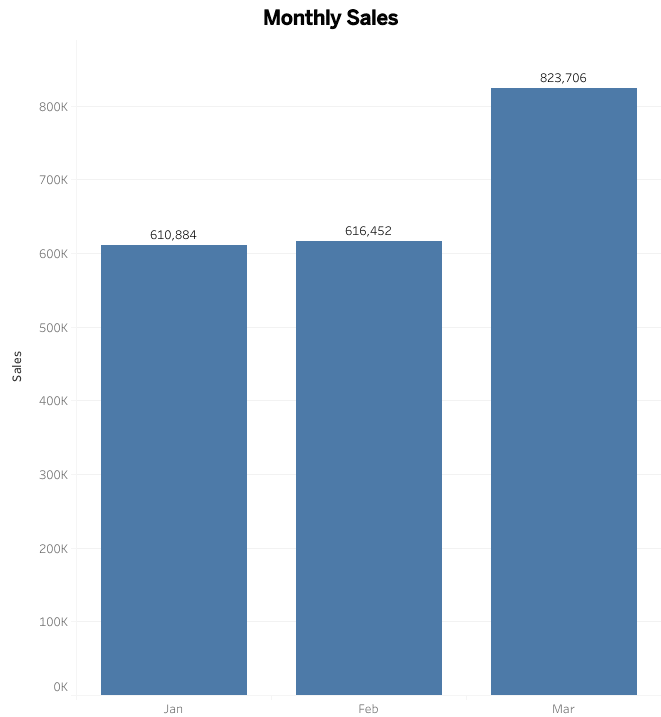

AS we see above, March recorded the highest sales by 823K , February and January almost 600K 

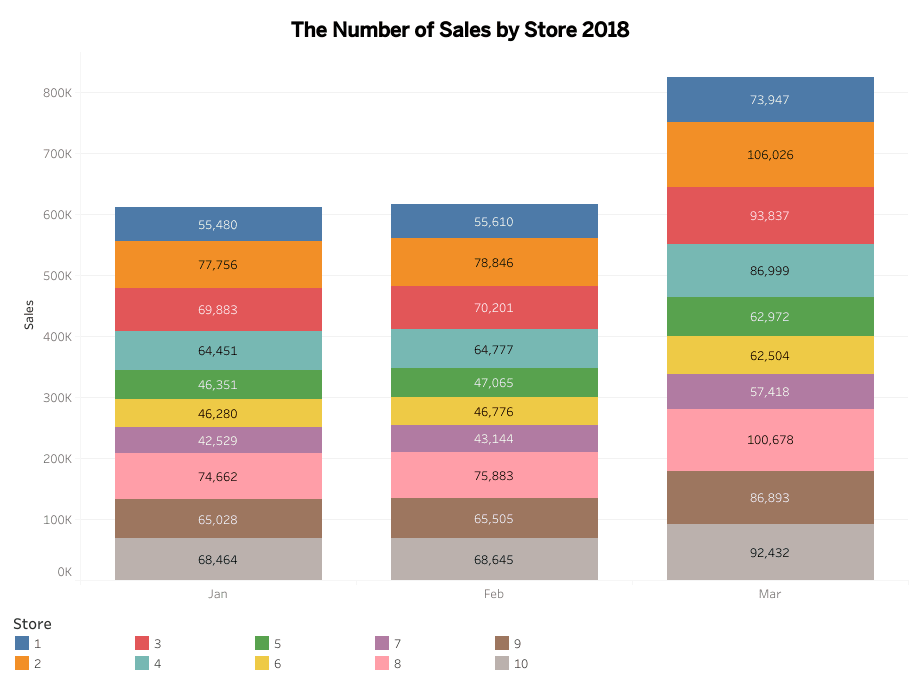

In this chart, we can see the sales of each store from Jan to Mar, and store 2 was the highest amount of sales then 8 and 3 respectively.

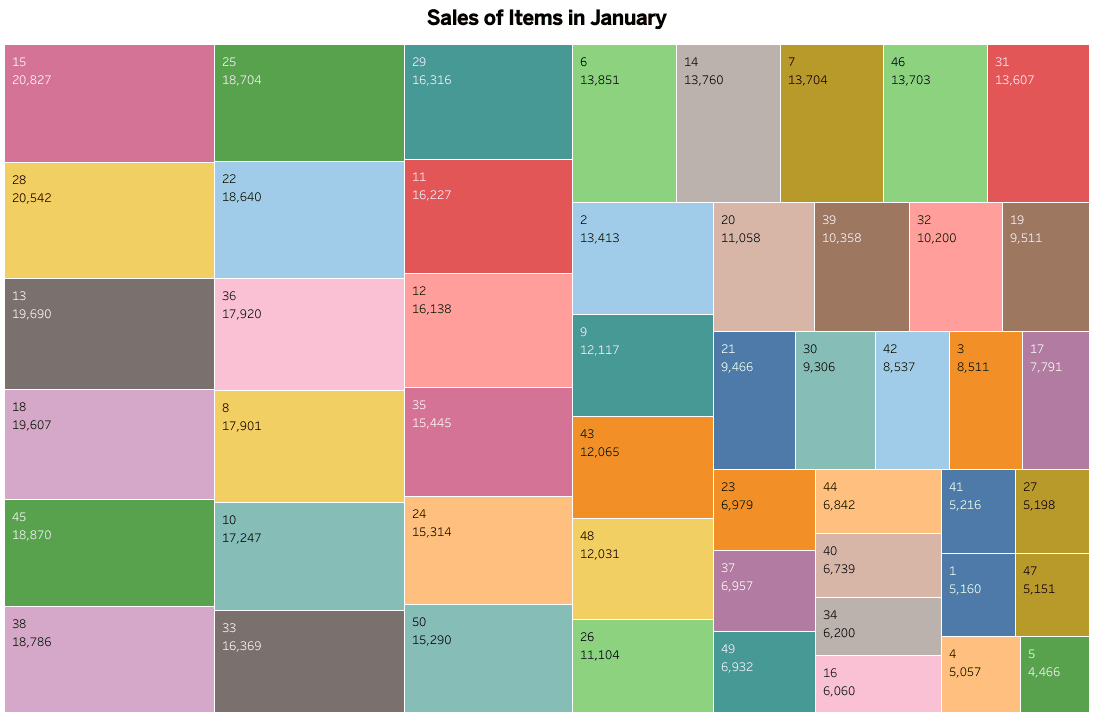

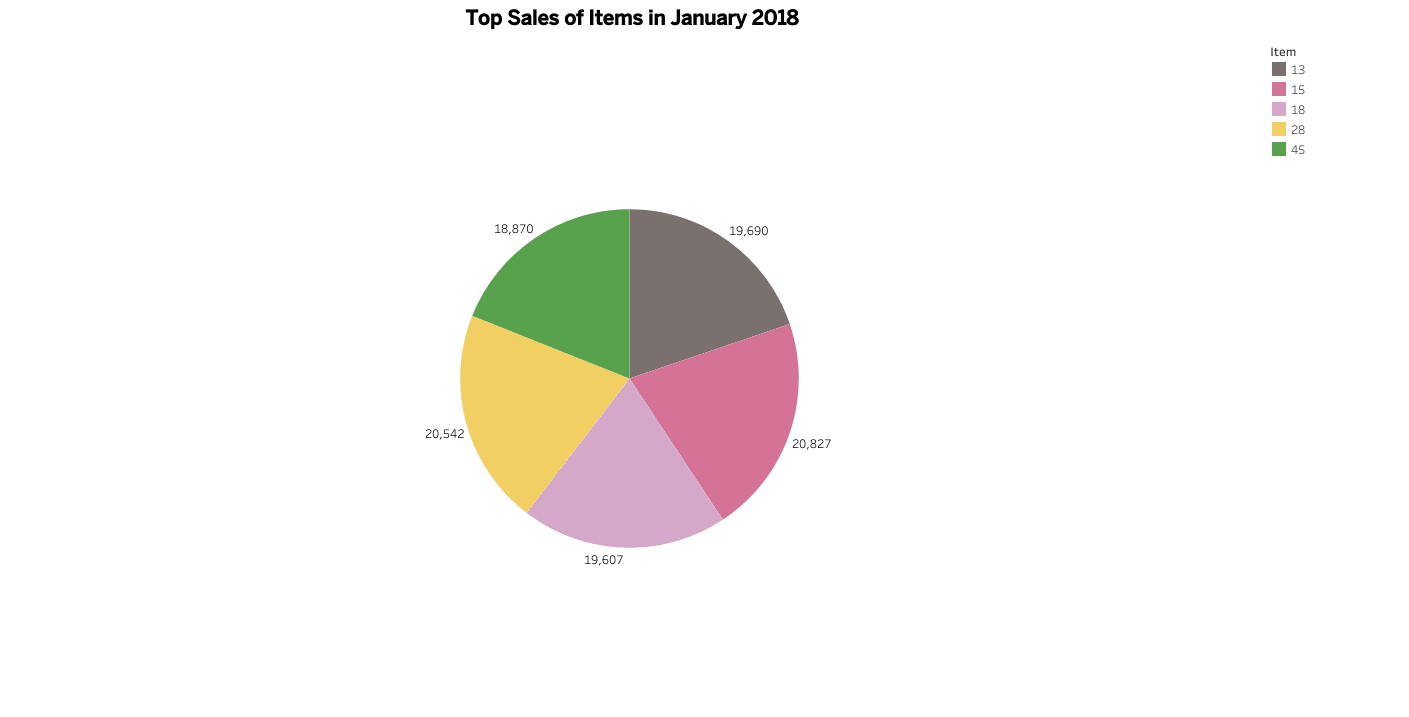

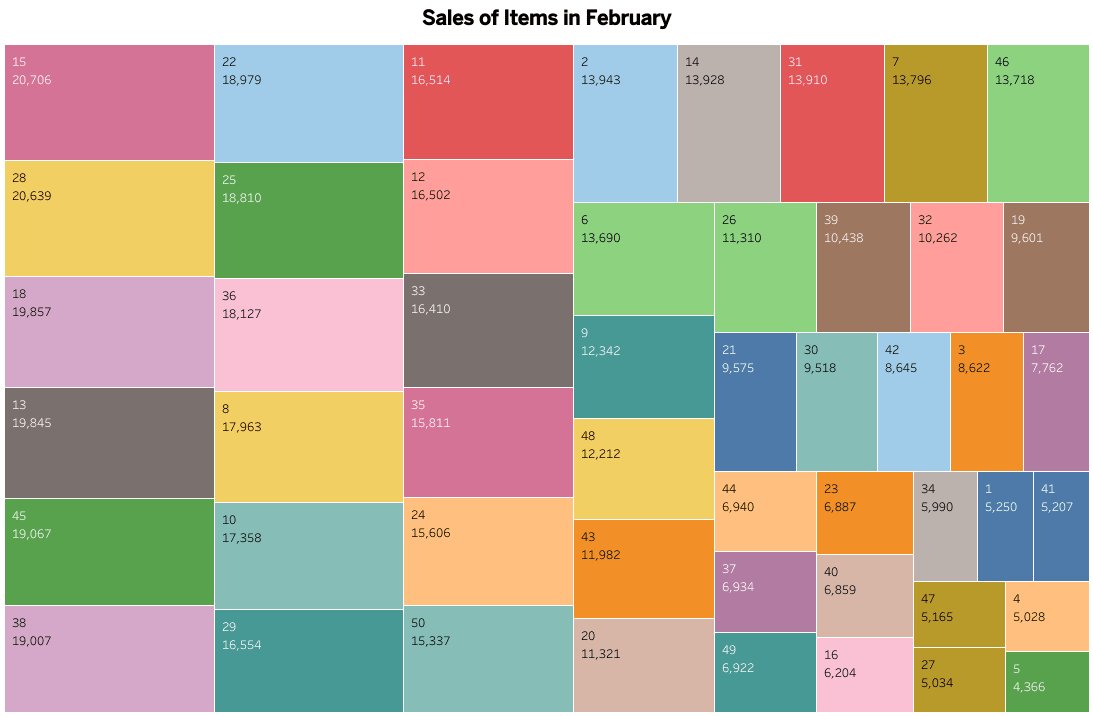

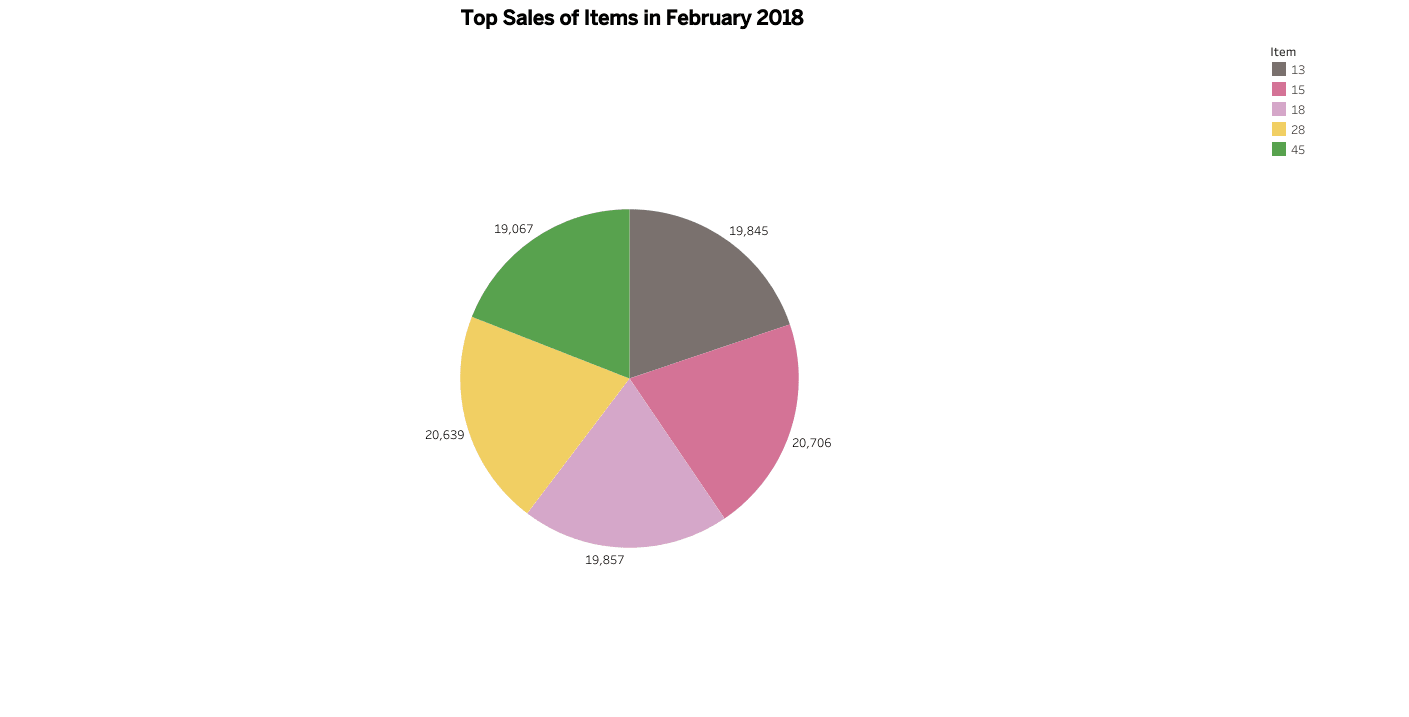

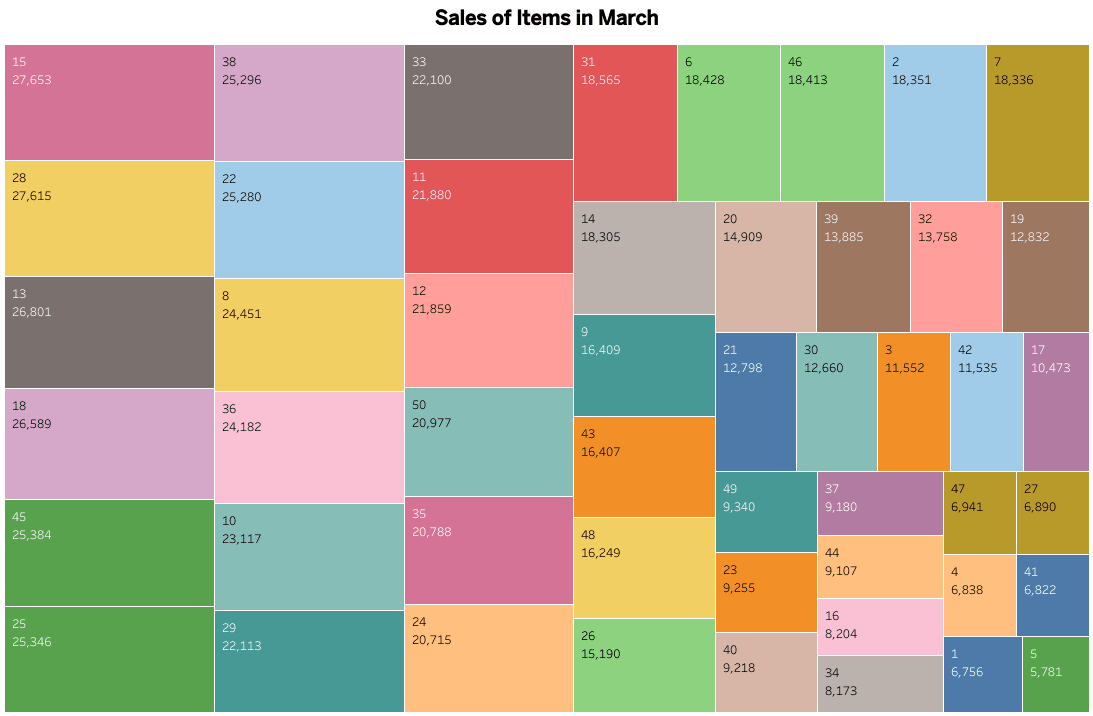

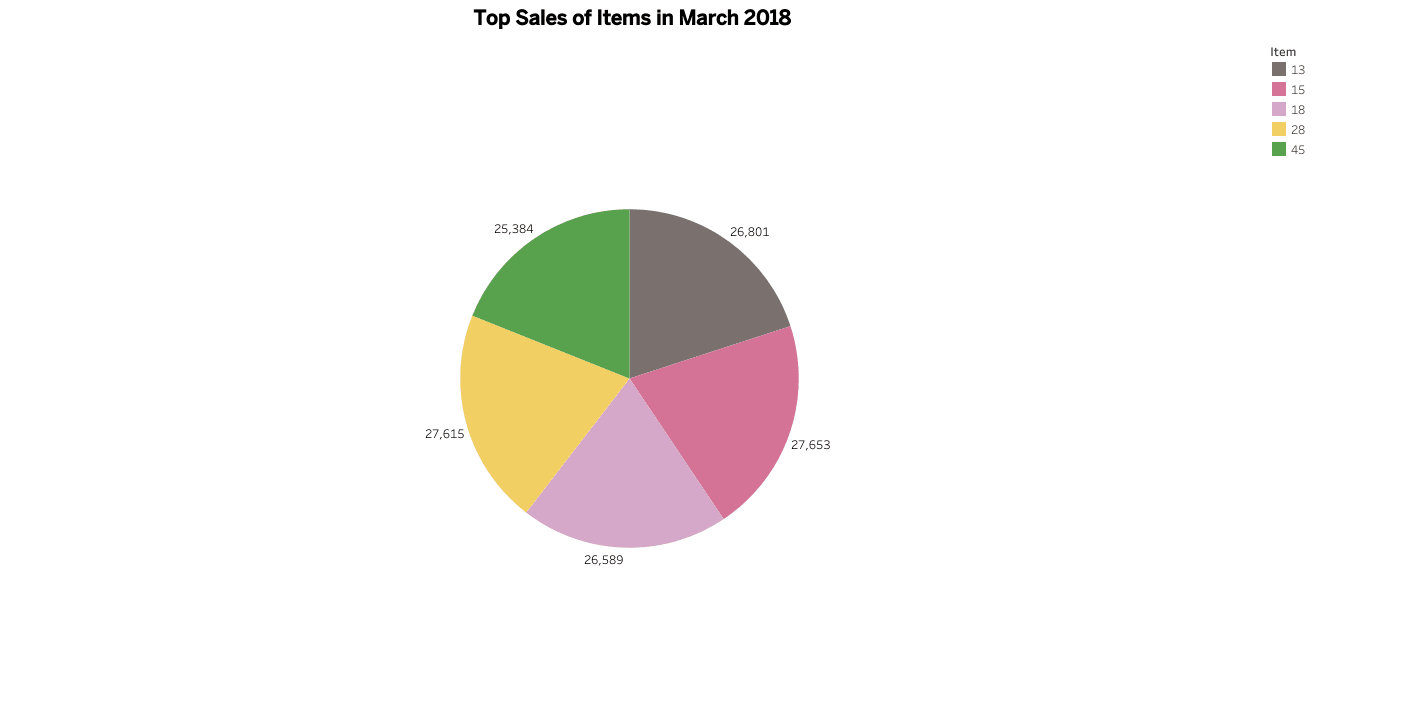

The common items in all months that had the highest numbers of sales were 15 and 28, on the other hand, the common items in all months that had the lowest numbers of sales was 5. 

## Kaggle Score 

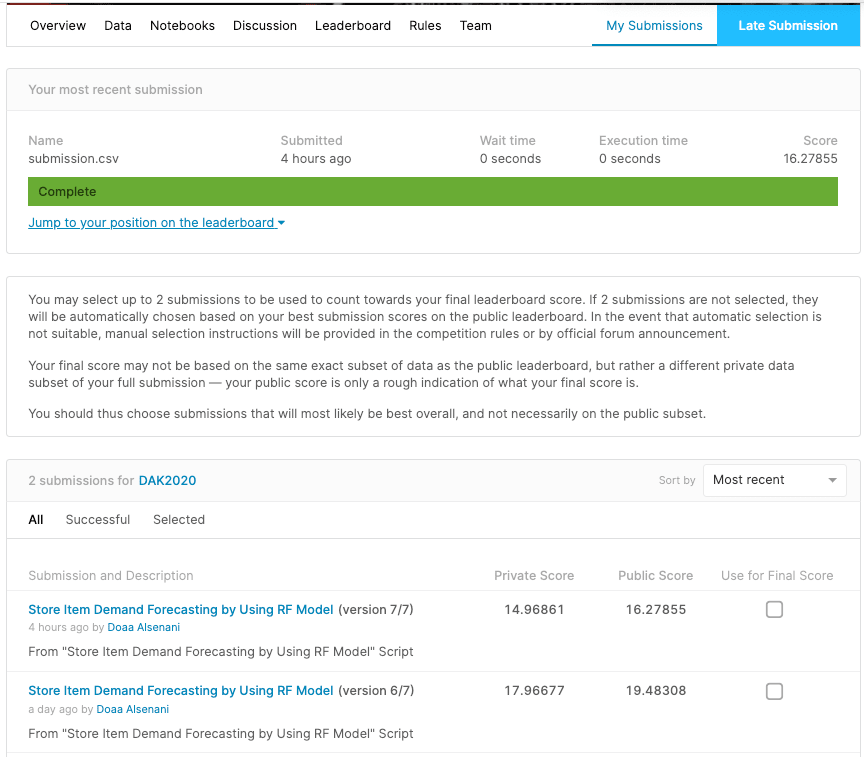